In [1]:
#%load_ext line_profiler
#%load_ext memory_profiler
%load_ext autoreload
%autoreload 2
import imgread
imgread.__version__
import imgread.read as ir

#import skimage.io
#import matplotlib
#import matplotlib.pyplot as plt
#%matplotlib inline
lif = "../tests/data/2015Aug28_TransHXB2_50min+DMSO.lif"
img_tile = "../tests/data/t4_1.tif"
img = "../tests/data/exp2_2.tif"

mcts = "../tests/data/multi-channel-time-series.ome.tif"

import javabridge
import bioformats

javabridge.start_vm(class_path=bioformats.JARS)

In [6]:
imgread.__version__

'0.2.1.post0.dev12+g4a0362f'

In [7]:
img_rdr, mdata = ir.img_reader(lif)
img_rdr.getFormat(), img_rdr.getSeriesCount()

('Leica Image File Format', 5)

In [98]:

%%mprun

mctsmd, _ = ir.read(lif)


In [102]:

lifmd2, lifwr2, kk2 = ir.read2(mcts, True)

In [110]:
kk2

{'getImageCount': 'Found',
 'getArcType': 'Jmiss',
 'getDetectorType': 'Jmiss',
 'getExperimentType': 'Jmiss',
 'getFilamentType': 'Jmiss',
 'getFilterType': 'Jmiss',
 'getLaserType': 'Jmiss',
 'getMicrobeamManipulationType': 'Jmiss',
 'getMicroscopeType': 'Jmiss',
 'getImageName': 'Found',
 'getPlateCount': 'Found',
 'getPixelsSizeX': 'Found',
 'getPixelsSizeY': 'Found',
 'getPixelsSizeT': 'Found',
 'getPixelsSizeZ': 'Found',
 'getPixelsSizeC': 'Found',
 'getPixelsBigEndian': 'Found',
 'getPixelsBinDataCount': 'Found',
 'getPixelsBinDataBigEndian': 'Jmiss',
 'getPixelsType': 'Found',
 'getPixelsDimensionOrder': 'Found',
 'getPixelsSignificantBits': 'Found',
 'getDetectorCount': 'Jmiss',
 'getShapeType': 'Jmiss',
 'getDoubleAnnotationAnnotationCount': 'Jmiss',
 'getShapeCount': 'Jmiss',
 'getDichroicCount': 'Jmiss',
 'getChannelCount': 'Found',
 'getEllipseTransform': 'Jmiss',
 'getExperimentDescription': 'Jmiss',
 'getDatasetCount': 'Found',
 'getCommentAnnotationAnnotationCount': 'Jm

In [113]:

[(k,kk2[k]) for k in kk2 if kk2[k] == 'None']

[('getChannelAcquisitionMode', 'None'),
 ('getChannelColor', 'None'),
 ('getChannelContrastMethod', 'None'),
 ('getChannelEmissionWavelength', 'None'),
 ('getChannelExcitationWavelength', 'None'),
 ('getChannelFluor', 'None'),
 ('getChannelIlluminationType', 'None'),
 ('getChannelNDFilter', 'None'),
 ('getChannelName', 'None'),
 ('getChannelPinholeSize', 'None'),
 ('getChannelPockelCellSetting', 'None'),
 ('getImageAcquisitionDate', 'None'),
 ('getImageDescription', 'None'),
 ('getPixelsPhysicalSizeX', 'None'),
 ('getPixelsPhysicalSizeY', 'None'),
 ('getPixelsPhysicalSizeZ', 'None'),
 ('getPixelsTimeIncrement', 'None')]

In [87]:
%load_ext line_profiler
%load_ext memory_profiler


In [121]:
%lprun -f ir.convert_value mctsmd2, _ = ir.read2(lif)

In [84]:
round(3.1234567,4)

3.1235

In [75]:
mctsmd

{'SizeS': 1,
 'Format': 'OME-TIFF',
 'PositionXYZ': set(),
 'Date': None,
 'Name': 'multi-channel-time-series',
 'Bits': 8,
 'SizeT': 7,
 'SizeZ': 1,
 'SizeC': 3,
 'SizeY': 167,
 'SizeX': 439,
 'PhysicalSizeZ': None,
 'PhysicalSizeY': None,
 'PhysicalSizeX': None}

In [33]:
md, missing_keys = ir.get_md_dict(mdata, img)

In [41]:
md['PixelsSizeZ']

[((0,), 41), ((1,), 40), ((2,), 43), ((3,), 39), ((4,), 37)]

In [56]:
md2, wr2 = ir.read2(img)

In [71]:
md2['PixelsSizeZ']

[((0,), 1)]

In [68]:
len (md2['PixelsSizeZ'])

1

In [69]:
lifmd, _ = ir.read(lif)

In [70]:
lifmd

{'SizeS': 5,
 'Format': 'Leica Image File Format',
 'series': [{'SizeZ': 41,
   'Name': 'Series001',
   'Date': '2015-08-28T10:10:37',
   'PositionXYZ': {(0.0434916298968, 0.0082344989076, 0.0)}},
  {'SizeZ': 40,
   'Name': 'Series004',
   'Date': '2015-08-28T10:23:49',
   'PositionXYZ': {(0.0434572221804, 0.008291016, 0.0)}},
  {'SizeZ': 43,
   'Name': 'Series007',
   'Date': '2015-08-28T10:37:47',
   'PositionXYZ': {(0.04336546827, 0.008319689097, 0.0)}},
  {'SizeZ': 39,
   'Name': 'Series009',
   'Date': '2015-08-28T10:51:18',
   'PositionXYZ': {(0.0438492490536, 0.0082767139974, 0.0)}},
  {'SizeZ': 37,
   'Name': 'Series011',
   'Date': '2015-08-28T11:04:05',
   'PositionXYZ': {(0.0439142644374, 0.007778354844, 0.0)}}],
 'PhysicalSizeX': 0.080245,
 'PhysicalSizeY': 0.080245,
 'PhysicalSizeZ': 0.2964,
 'SizeX': 512,
 'SizeY': 512,
 'SizeC': 3,
 'SizeT': 1,
 'Bits': 8}

In [15]:
metadata = mdata
class FoundMetadata(Exception): pass

md = {}
missing_keys = []
none_keys = []
javaexception_logfile = open("error.log", "w")
for i in range(len(ttt)):
    try:
        for npar in range(5):
            try:
                t = (0,)*npar
                k = ttt[i]
                v = getattr(metadata, k)(*t)
                raise FoundMetadata()
            except TypeError:
                continue
    except FoundMetadata:
        if v == None:
            none_keys.append(k[3:])
        else:
            # md[k] = [(npar, convertion(v))] # this get only the first value
            md[k[3:]] = ir.get_allvalues_grouped(metadata, k, npar)
    except Exception as e:
        missing_keys.append(k[3:])
        javaexception_logfile.write(str((k, type(e), e, "--", npar))+'\n')
        continue
javaexception_logfile.close()

print(len(md))
md

97


{'ImageCount': [((), 5)],
 'DetectorType': [((4, 2), 'PMT')],
 'LaserType': [((4, 5), 'Other')],
 'MicroscopeType': [((4,), 'Other')],
 'ImageName': [((0,), 'Series001'),
  ((1,), 'Series004'),
  ((2,), 'Series007'),
  ((3,), 'Series009'),
  ((4,), 'Series011')],
 'PlateCount': [((), 0)],
 'PixelsSizeX': [((4,), 512)],
 'PixelsSizeY': [((4,), 512)],
 'PixelsSizeT': [((4,), 1)],
 'PixelsSizeZ': [((0,), 41), ((1,), 40), ((2,), 43), ((3,), 39), ((4,), 37)],
 'PixelsSizeC': [((4,), 3)],
 'PixelsBigEndian': [((4,), False)],
 'PixelsBinDataCount': [((4,), 0)],
 'PixelsType': [((4,), 'uint8')],
 'PixelsDimensionOrder': [((4,), 'XYCZT')],
 'PixelsSignificantBits': [((4,), 8)],
 'DetectorCount': [((4,), 3)],
 'DichroicCount': [((4,), 0)],
 'ChannelCount': [((4,), 3)],
 'DatasetCount': [((), 0)],
 'LightSourceType': [((4, 5), 'Laser')],
 'LightSourceCount': [((4,), 6)],
 'LightSourceAnnotationRefCount': [((4, 5), 0)],
 'InstrumentAnnotationRefCount': [((4,), 0)],
 'ObjectiveAnnotationRefCount': 

In [16]:
missing_keys

['ArcType',
 'ExperimentType',
 'FilamentType',
 'MicrobeamManipulationType',
 'PixelsBinDataBigEndian',
 'ShapeType',
 'DoubleAnnotationAnnotationCount',
 'ShapeCount',
 'EllipseTransform',
 'ExperimentDescription',
 'CommentAnnotationAnnotationCount',
 'BooleanAnnotationAnnotationCount',
 'EllipseTheT',
 'EllipseTheZ',
 'FileAnnotationAnnotationCount',
 'ListAnnotationAnnotationCount',
 'LongAnnotationAnnotationCount',
 'MapAnnotationAnnotationCount',
 'TagAnnotationAnnotationCount',
 'TermAnnotationAnnotationCount',
 'TimestampAnnotationAnnotationCount',
 'XMLAnnotationAnnotationCount',
 'FolderAnnotationRefCount',
 'PlateAnnotationRefCount',
 'ExperimenterGroupAnnotationRefCount',
 'ScreenAnnotationRefCount',
 'ReagentAnnotationRefCount',
 'ExperimenterAnnotationRefCount',
 'DichroicAnnotationRefCount',
 'WellAnnotationRefCount',
 'PlateAcquisitionAnnotationRefCount',
 'ROIAnnotationRefCount',
 'ProjectAnnotationRefCount',
 'DatasetAnnotationRefCount',
 'ShapeAnnotationRefCount',
 

In [49]:
getattr(mdata, 'getChannelExcitationWavelength')(0,1)

Instance of ome.units.quantity.Length: ome.units.quantity.Length: value[543.0], unit[nm] stored as java.lang.Double

In [26]:
import pprint

with open("mydatafile.txt", 'w') as f:
    for k, v in md.items():
        if len(v) > 1:
            f.write("\n{:>34}\n{}".format(k, pprint.pformat(v, indent=35, width=110)))
        else:
            f.write("\n{:>34}\t{}".format(k, pprint.pformat(v[0])))
        #f.write(pprint.pformat(md[k]))

In [25]:
getattr(mdata, 'getLightPathEmissionFilterRef')(0,0,0)

'Filter:0:0'

In [55]:
metadata.getImageAcquisitionDate(0)

Instance of ome.xml.model.primitives.Timestamp: 2016-06-24T10:40:22

In [19]:
metadata.getPlanePositionX(0,0), metadata.getPlaneTheC(14,11)

(Instance of ome.units.quantity.Length: ome.units.quantity.Length: value[44.25643], unit[reference frame] stored as java.lang.Double,
 Instance of ome.xml.model.primitives.NonNegativeInteger: 3)

In [7]:
metadata.getPixelsPhysicalSizeX(14).value().doubleValue(), pixels.getPhysicalSizeX().value().doubleValue()

(0.1333333, 0.1333333)

In [113]:
wrapper = bioformats.formatreader.ImageReader(path=filepath, perform_init=False)
wrapper.rdr = rdr

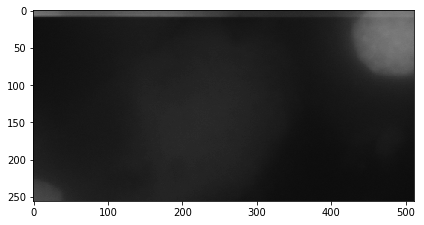

In [115]:
#%memit a = wrapper.read(c=2, t=0, series=4, z=21, rescale=False, wants_max_intensity=, XYWH=(,,,))
a, max_int = wrapper.read(c=1, t=0, series=0, z=0, rescale=False, wants_max_intensity=True)
# wrapper.read(c=2, t=0, series=4, z=21, rescale=False, wants_max_intensity=True, XYWH=(320,254,1,1))
#skimage.io.imshow(a)
#max_int
a, max_int, a.max()
skimage.io.imshow(a)

In [14]:
# The plane data isn't in the planes, it's in the tiff data
for idx in range(pixels.sizeOfPlaneList()):
    plane = pixels.getPlane(idx)
    c = plane.getTheC().getValue().intValue()
    t = plane.getTheT().getValue().intValue()
    print("TiffData: c=%d, t=%d" % (c, t))

TiffData: c=0, t=0
TiffData: c=1, t=0
TiffData: c=0, t=1
TiffData: c=1, t=1
TiffData: c=0, t=2
TiffData: c=1, t=2
TiffData: c=0, t=3
TiffData: c=1, t=3
TiffData: c=0, t=4
TiffData: c=1, t=4
TiffData: c=0, t=5
TiffData: c=1, t=5
TiffData: c=0, t=6
TiffData: c=1, t=6
TiffData: c=0, t=7
TiffData: c=1, t=7
TiffData: c=0, t=8
TiffData: c=1, t=8
TiffData: c=0, t=9
TiffData: c=1, t=9
TiffData: c=0, t=10
TiffData: c=1, t=10
TiffData: c=0, t=11
TiffData: c=1, t=11
TiffData: c=0, t=12
TiffData: c=1, t=12
TiffData: c=0, t=13
TiffData: c=1, t=13
TiffData: c=0, t=14
TiffData: c=1, t=14
TiffData: c=0, t=15
TiffData: c=1, t=15
TiffData: c=0, t=16
TiffData: c=1, t=16
TiffData: c=0, t=17
TiffData: c=1, t=17
TiffData: c=0, t=18
TiffData: c=1, t=18
TiffData: c=0, t=19
TiffData: c=1, t=19
TiffData: c=0, t=20
TiffData: c=1, t=20
TiffData: c=0, t=21
TiffData: c=1, t=21
TiffData: c=0, t=22
TiffData: c=1, t=22
TiffData: c=0, t=23
TiffData: c=1, t=23
TiffData: c=0, t=24
TiffData: c=1, t=24
TiffData: c=0, t=25


### XML
    getRoot is used in imgread-0.2.1

In [132]:
import imgread.read as ir
mdat, wr = ir.read(img_tile)
mdat

{'SizeS': 15,
 'Format': 'OME-TIFF',
 'series': [{'PositionXYZ': {(44.25643, 79.04421, 21.067)}},
  {'PositionXYZ': {(44.3247, 79.04421, 21.067)}},
  {'PositionXYZ': {(44.39296, 79.04421, 21.067)}},
  {'PositionXYZ': {(44.39296, 79.07835, 21.067)}},
  {'PositionXYZ': {(44.3247, 79.07835, 21.067)}},
  {'PositionXYZ': {(44.25643, 79.07835, 21.067)}},
  {'PositionXYZ': {(44.25643, 79.11248, 21.067)}},
  {'PositionXYZ': {(44.3247, 79.11248, 21.067)}},
  {'PositionXYZ': {(44.39296, 79.11248, 21.067)}},
  {'PositionXYZ': {(44.39296, 79.14661, 21.067)}},
  {'PositionXYZ': {(44.3247, 79.14661, 21.067)}},
  {'PositionXYZ': {(44.25643, 79.14661, 21.067)}},
  {'PositionXYZ': {(44.25643, 79.18075, 21.067)}},
  {'PositionXYZ': {(44.3247, 79.18075, 21.067)}},
  {'PositionXYZ': {(44.39296, 79.18075, 21.067)}}],
 'PhysicalSizeX': 0.133333,
 'PhysicalSizeY': 0.133333,
 'PhysicalSizeZ': 1000.0,
 'SizeX': 512,
 'SizeY': 256,
 'SizeC': 4,
 'SizeZ': 1,
 'SizeT': 3,
 'Bits': 16,
 'Name': None,
 'Date': '201

In [157]:
instrument = root.getInstrument(0)
detector = instrument.getDetector(0)
detector.getModel()

'Andor Ultra 897'

In [159]:
[m for m in root.methods if m[:3]=='get']

['getUUID',
 'getInstrument',
 'getImage',
 'getStructuredAnnotations',
 'getROI',
 'getFolder',
 'getPlate',
 'getExperimenterGroup',
 'getScreen',
 'getExperimenter',
 'getProject',
 'getDataset',
 'getExperiment',
 'getBinaryOnly',
 'getRights',
 'getCreator',
 'getClass']

In [180]:
image = root.getImage(14)
[m for m in image.methods if m[:3]=='get']

['getStageLabel',
 'getDescription',
 'getLinkedInstrument',
 'getLinkedExperimenterGroup',
 'getLinkedDataset',
 'getLinkedExperimenter',
 'getLinkedFolder',
 'getLinkedAnnotation',
 'getPixels',
 'getLinkedROI',
 'getImagingEnvironment',
 'getAcquisitionDate',
 'getLinkedExperiment',
 'getLinkedMicrobeamManipulation',
 'getObjectiveSettings',
 'getLinkedWellSample',
 'getName',
 'getID',
 'getClass']

In [229]:
obj = image.getObjectiveSettings()
[m for m in obj.methods if m[:3]=='get']
obj.getID()

'Objective:60XWater:02d4abc1-10b3-4040-9f9c-f584a7b9595f'

In [109]:
ch = pixels.getChannel(0)
[m for m in ch.methods if m[:3]=='get']

['getAcquisitionMode',
 'getContrastMethod',
 'getIlluminationType',
 'getEmissionWavelength',
 'getExcitationWavelength',
 'getSamplesPerPixel',
 'getPinholeSize',
 'getLinkedAnnotation',
 'getPixels',
 'getLightPath',
 'getColor',
 'getLinkedFilterSet',
 'getFluor',
 'getNDFilter',
 'getPockelCellSetting',
 'getDetectorSettings',
 'getLightSourceSettings',
 'getName',
 'getID',
 'getClass']

In [111]:
lp = ch.getLightPath()
[m for m in lp.methods if m[:3]=='get']

['getLinkedAnnotation',
 'getLinkedDichroic',
 'getLinkedEmissionFilter',
 'getLinkedExcitationFilter',
 'getClass']

In [122]:
ex = lp.getLinkedExcitationFilter(0)
[m for m in ex.methods if m[:3]=='get']

['getInstrument',
 'getLinkedAnnotation',
 'getFilterWheel',
 'getTransmittanceRange',
 'getLinkedFilterSetExcitationFilter',
 'getLinkedFilterSetEmissionFilter',
 'getLinkedLightPathExcitationFilter',
 'getLinkedLightPathEmissionFilter',
 'getType',
 'getID',
 'getLotNumber',
 'getManufacturer',
 'getModel',
 'getSerialNumber',
 'getClass']

In [123]:
ex.getID()

'Filter:f914c80d-556d-425f-b9d4-60097856fbac'

In [194]:
pixels = image.getPixels()
[m for m in pixels.methods if m[:3]=='get']

['getSizeX',
 'getSizeY',
 'getSizeC',
 'getSizeZ',
 'getSizeT',
 'getDimensionOrder',
 'getPhysicalSizeX',
 'getPhysicalSizeY',
 'getPhysicalSizeZ',
 'getPlane',
 'getTiffData',
 'getBinData',
 'getBigEndian',
 'getInterleaved',
 'getSignificantBits',
 'getTimeIncrement',
 'getMetadataOnly',
 'getType',
 'getChannel',
 'getID',
 'getClass']

In [208]:
pixels.getTimeIncrement()

In [219]:
plane = pixels.getPlane(11)
[m for m in plane.methods if m[:3]=='get']

['getExposureTime',
 'getPositionX',
 'getPositionY',
 'getPositionZ',
 'getLinkedAnnotation',
 'getPixels',
 'getTheC',
 'getTheT',
 'getTheZ',
 'getDeltaT',
 'getHashSHA1',
 'getClass']

In [220]:
plane.getTheC(), plane.getDeltaT(), plane.getExposureTime()

(Instance of ome.xml.model.primitives.NonNegativeInteger: 3,
 Instance of ome.units.quantity.Time: ome.units.quantity.Time: value[63.34547], unit[s] stored as java.lang.Double,
 Instance of ome.units.quantity.Time: ome.units.quantity.Time: value[1.0], unit[s] stored as java.lang.Double)

In [133]:
for k in root.methods:
    if k[:3] == 'get':
        print(k)

getUUID
getInstrument
getImage
getStructuredAnnotations
getROI
getFolder
getPlate
getExperimenterGroup
getScreen
getExperimenter
getProject
getDataset
getExperiment
getBinaryOnly
getRights
getCreator
getClass


In [52]:
root.getInstrument(0).getDetector(0).getModel()

'Andor Ultra 897'

In [16]:
metadata.getExperimentID(0)

'Experiment:19d309c2-f890-43ef-900e-7671c12e1a8f'

In [17]:
root.getExperiment(0)

Instance of ome.xml.model.Experiment: ome.xml.model.Experiment@341b71fb

In [18]:
im = root.getImage(0)
obj = im.getObjectiveSettings()
obj.getID(), obj.getMedium(), obj.getRefractiveIndex(), obj.getCorrectionCollar(), obj.getObjective()

('Objective:10XAir:8882c051-9fd3-4ee4-8049-5c38fe9ce2bc',
 None,
 None,
 None,
 None)

In [19]:
metadata.getObjectiveID(0,0) == obj.getID(), metadata.getObjectiveLensNA(0,0)

(True, Instance of java.lang.Double: 0.3)

## md vs root (to remember)

from md i can get info on camera, objetives ...

but also key parameters like exposuretime, DeltaT, planePositionXYZ

In [20]:

#might be used to check if metadata are the same for all series
(metadata.getObjectiveCount(0),
 metadata.getObjectiveImmersion(0, 0),
 metadata.getPixelsDimensionOrder(0),
 metadata.getPixelsPhysicalSizeX(0),
 #metadata.getTiffDataIFD(0, 5), only fei
 metadata.getObjectiveLensNA(0, 0),
 metadata.getChannelCount(0),
 metadata.getDetectorSettingsBinning(0,1), # serie, channel
 metadata.getDetectorModel(0,0),
 metadata.getDetectorType(0,0),
 metadata.getTiffDataCount(0),
 metadata.getPlaneExposureTime(0,1), #none.value() catch this error with try
 metadata.getPlaneDeltaT(0,2).value(),
 metadata.getPlaneDeltaT(0,33).value().doubleValue(),
 metadata.getPlanePositionX(0,0),
 metadata.getScreenCount(),
 #metadata.getXMLAnnotationCount(),
)
# cerca tutti i ...Count()

(4,
 Instance of ome.xml.model.enums.Immersion: Air,
 Instance of ome.xml.model.enums.DimensionOrder: XYCTZ,
 Instance of ome.units.quantity.Length: ome.units.quantity.Length: value[0.74], unit[µm] stored as java.lang.Double,
 Instance of java.lang.Double: 0.3,
 2,
 Instance of ome.xml.model.enums.Binning: 1x1,
 'QImaging Retiga 2000DC',
 Instance of ome.xml.model.enums.DetectorType: CCD,
 162,
 Instance of ome.units.quantity.Time: ome.units.quantity.Time: value[0.16], unit[s] stored as java.lang.Double,
 Instance of java.lang.Double: 6.21581,
 96.30042,
 Instance of ome.units.quantity.Length: ome.units.quantity.Length: value[0.417793], unit[reference frame] stored as java.lang.Double,
 0)

In [29]:
metadata.getXMLAnnotationValue(0) == metadata.getRoot().getStructuredAnnotations().getXMLAnnotation(0).getValue()

True

In [30]:
md = bioformats.get_omexml_metadata(lif)
from xml.etree import ElementTree as ETree
mdroot = ETree.fromstring(metadata.dumpXML())
mdroot = ETree.fromstring(metadata.getRoot().getStructuredAnnotations().getXMLAnnotation(0).getValue())
#mdroot = ETree.fromstring(md)

for a in mdroot:
    print((a.tag, a.attrib))
    for aa in a:
        print((" GGSSS ", aa.tag, aa.attrib))
        for aaa in aa:
            print((" GGSSS2 ", aaa.tag, aaa.attrib))

('LADisplayName', {'Name': 'Arosio'})
('AuxDevice', {'ID': 'Computer:BFEBFBFF000106A5', 'Manufacturer': 'Unknown', 'Model': 'Computer'})
('AuxDevice', {'ID': 'PolytropeIIYanus:18fc49b6-f28c-45d3-920a-20426bd336e1', 'Manufacturer': 'FEI Munich', 'Model': 'Polytrope II with Yanus'})
('AuxDevice', {'ID': 'HadrwareAutofocus:fdc9de9a-4977-49f3-9d00-45470ae7abcd', 'Manufacturer': 'Unknown', 'Model': 'Hardware Autofocus'})
('TubeRefractor', {'CamID': 'Detector:fbebcf78-372b-422c-a851-fa2390141e50', 'Factor': '2'})
('TubeRefractor', {'CamID': 'Detector:2ba613dc-f2d3-4942-b27e-1ad2e8f7d607', 'Factor': '1.002'})
('FilterDeviceDescription', {'ID': 'Microscope:f9c537de-6dc8-4c63-9949-669d05333b45', 'Name': 'iMIC with Imaging Control Unit'})
(' GGSSS ', 'FilterSliderDescription', {'Index': '0', 'Name': 'iMIC [Filters]'})
(' GGSSS2 ', 'FilterRef', {'ID': 'Filter:9999be3c-b023-4052-959d-b602e800a393'})
(' GGSSS2 ', 'FilterRef', {'ID': 'Filter:c4f14ec0-414c-475a-9dcb-b25ef3fb856c'})
(' GGSSS2 ', 'Filt

In [114]:
import xmltodict

m1 = xmltodict.parse(metadata.dumpXML())
m2 = xmltodict.parse(bioformats.get_omexml_metadata(img_tile))
m2['OME']


OrderedDict([('@xmlns', 'http://www.openmicroscopy.org/Schemas/OME/2016-06'),
             ('@xmlns:xsi', 'http://www.w3.org/2001/XMLSchema-instance'),
             ('@xsi:schemaLocation',
              'http://www.openmicroscopy.org/Schemas/OME/2016-06 http://www.openmicroscopy.org/Schemas/OME/2016-06/ome.xsd'),
             ('Image',
              OrderedDict([('@ID', 'Image:0'),
                           ('@Name', 't4_1.tif'),
                           ('Description',
                            '&lt;Children&gt;;     &lt;count&gt;2&lt;/count&gt;;         &lt;Name&gt;Loop&lt;/Name&gt;;         &lt;Properties&gt;;           &lt;count&gt;7&lt;/count&gt;;           &lt;item_0&gt;;             &lt;name&gt;wellplate&lt;/name&gt;;             &lt;Relative&gt;False&lt;/Relative&gt;;             &lt;ForAnalysis&gt;False&lt;/ForAnalysis&gt;;           &lt;/item_0&gt;;           &lt;item_1&gt;;             &lt;name&gt;global_coordinates&lt;/name&gt;;               &lt;count&gt;1&lt;/count&g

In [32]:
metalist = [(child.tag, [[child.attrib]]) for child in ETree.fromstring(metadata.dumpXML()).iter()]

In [71]:
m = metalist[10]
m[0], m[1][0][0]

('{http://www.openmicroscopy.org/Schemas/OME/2016-06}Arc',
 {'ID': 'LightSource:ff66e760-45e5-4bba-9d9a-c780080f3d01_0',
  'Manufacturer': 'FEI Munich',
  'Model': 'Oligochrome_0',
  'Power': '150.0',
  'PowerUnit': 'mW',
  'Type': 'Xe'})

In [24]:
for child in mdroot:
    if child.tag.endswith(''):
        for grandchild in child:
            print((grandchild.tag, grandchild.attrib))

('{http://www.openmicroscopy.org/Schemas/OME/2016-06}Microscope', {'Model': 'TCS SP5', 'Type': 'Other'})
('{http://www.openmicroscopy.org/Schemas/OME/2016-06}Laser', {'ID': 'LightSource:0:0', 'LaserMedium': 'Other', 'Type': 'Other', 'Wavelength': '458.0', 'WavelengthUnit': 'nm'})
('{http://www.openmicroscopy.org/Schemas/OME/2016-06}Laser', {'ID': 'LightSource:0:1', 'LaserMedium': 'Other', 'Type': 'Other', 'Wavelength': '476.0', 'WavelengthUnit': 'nm'})
('{http://www.openmicroscopy.org/Schemas/OME/2016-06}Laser', {'ID': 'LightSource:0:2', 'LaserMedium': 'Other', 'Type': 'Other', 'Wavelength': '488.0', 'WavelengthUnit': 'nm'})
('{http://www.openmicroscopy.org/Schemas/OME/2016-06}Laser', {'ID': 'LightSource:0:3', 'LaserMedium': 'Other', 'Type': 'Other', 'Wavelength': '514.0', 'WavelengthUnit': 'nm'})
('{http://www.openmicroscopy.org/Schemas/OME/2016-06}Laser', {'ID': 'LightSource:0:4', 'LaserMedium': 'Other', 'Type': 'Other', 'Wavelength': '543.0', 'WavelengthUnit': 'nm'})
('{http://www.o